In [1]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'2.5.1+cpu'

In [2]:
# !pip install torchvision

In [3]:
# import requests
# import zipfile
from pathlib import Path

# # Setup path to data folder
# data_path = Path("data/")
# image_path = data_path / "pizza_steak_sushi"

# # If the image folder doesn't exist, download it and prepare it... 
# if image_path.is_dir():
#     print(f"{image_path} directory exists.")
# else:
#     print(f"Did not find {image_path} directory, creating one...")
#     image_path.mkdir(parents=True, exist_ok=True)
    
#     # Download pizza, steak, sushi data
#     with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
#         request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
#         print("Downloading pizza, steak, sushi data...")
#         f.write(request.content)

#     # Unzip pizza, steak, sushi data
#     with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
#         print("Unzipping pizza, steak, sushi data...") 
#         zip_ref.extractall(image_path)

In [4]:
data_path = Path("data")
image_path = data_path / ""

In [5]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data'.
There are 3 directories and 0 images in 'data\test'.
There are 0 directories and 46 images in 'data\test\ripe'.
There are 0 directories and 53 images in 'data\test\rotten'.
There are 0 directories and 69 images in 'data\test\unripe'.
There are 3 directories and 0 images in 'data\train'.
There are 0 directories and 158 images in 'data\train\ripe'.
There are 0 directories and 282 images in 'data\train\rotten'.
There are 0 directories and 185 images in 'data\train\unripe'.


In [7]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/train'), WindowsPath('data/test'))

Random image path: data\test\ripe\IMG_1210.jpg
Image class: ripe
Image height: 3024
Image width: 3024


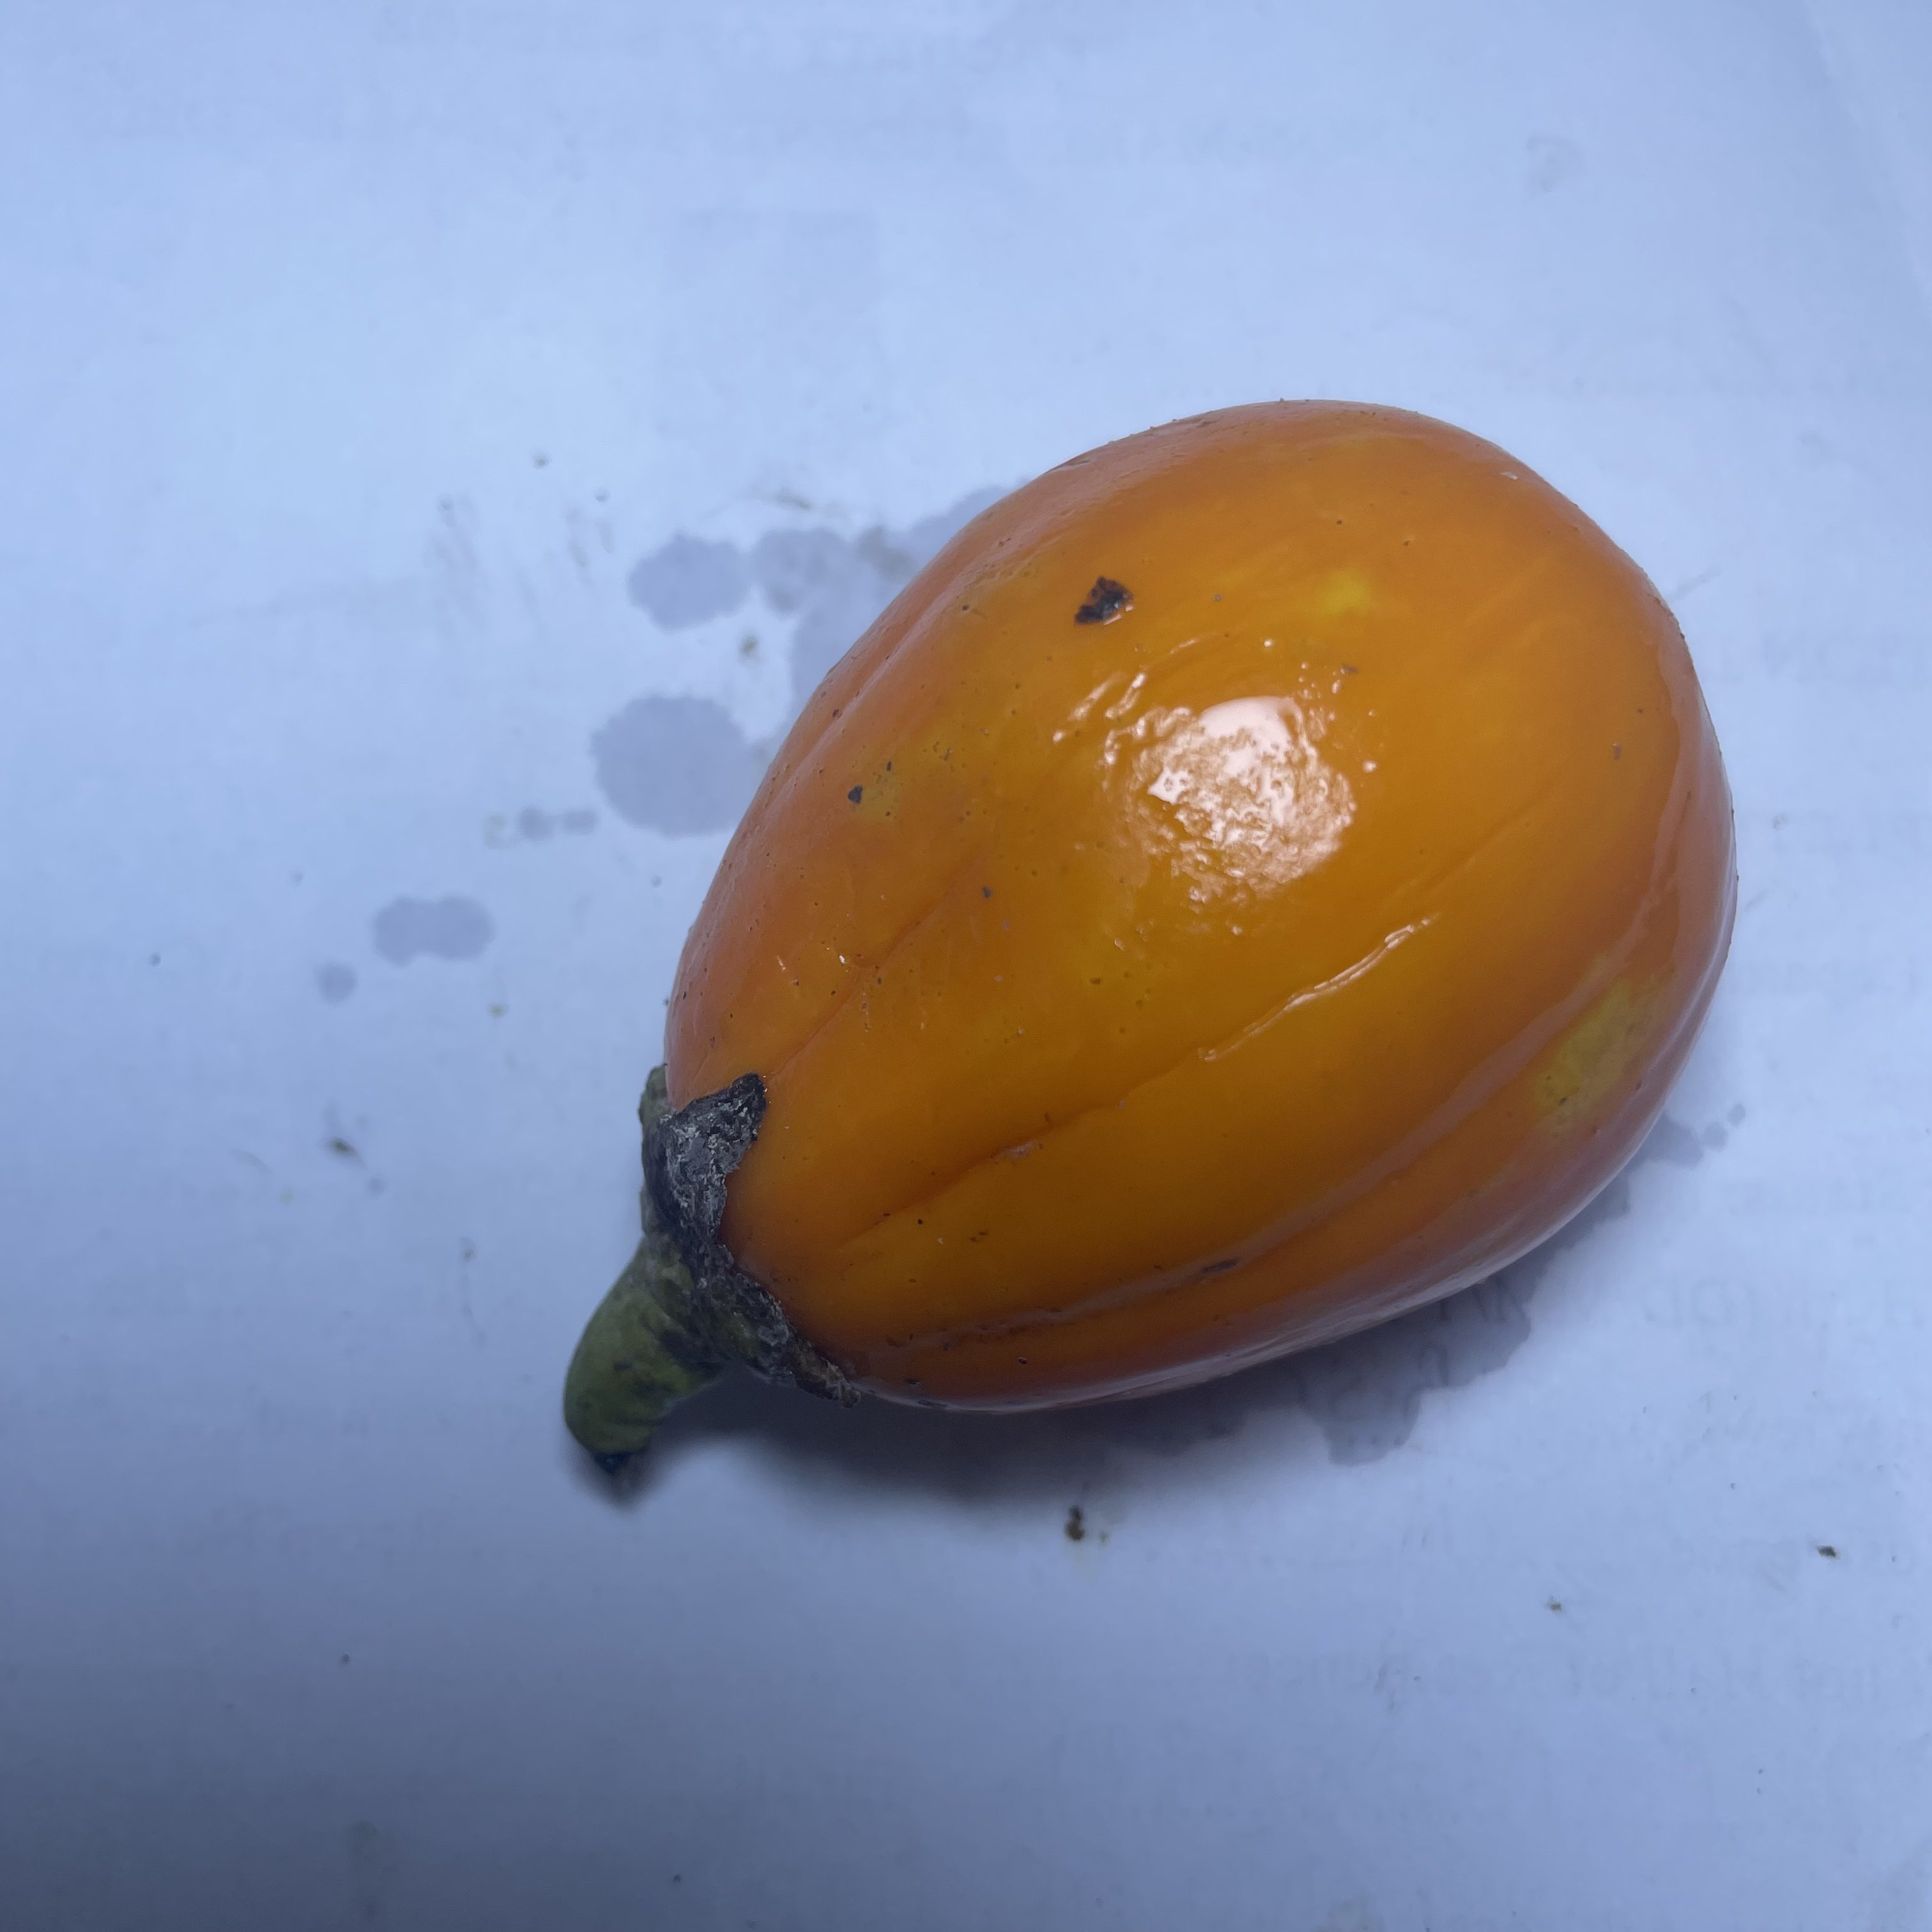

In [8]:
import random
from PIL import Image

# Set seed
random.seed(43) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

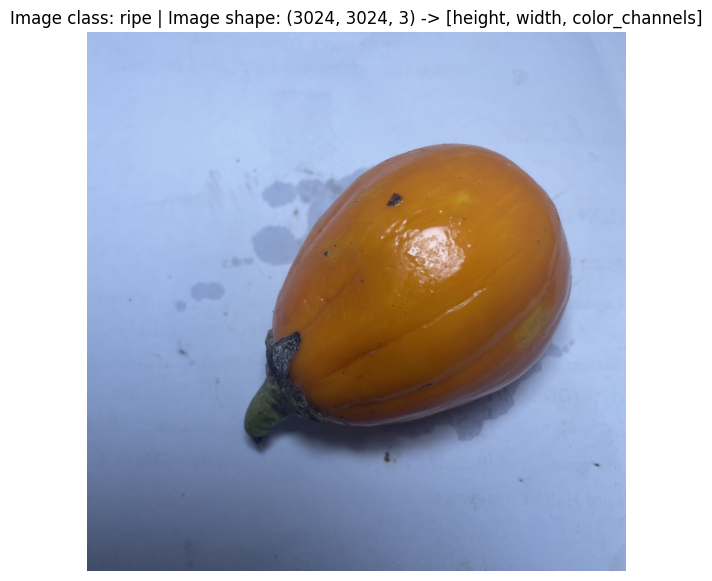

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

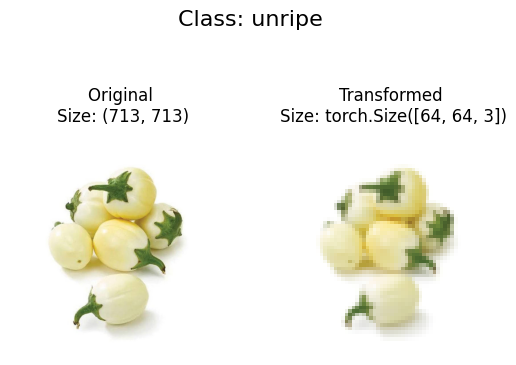

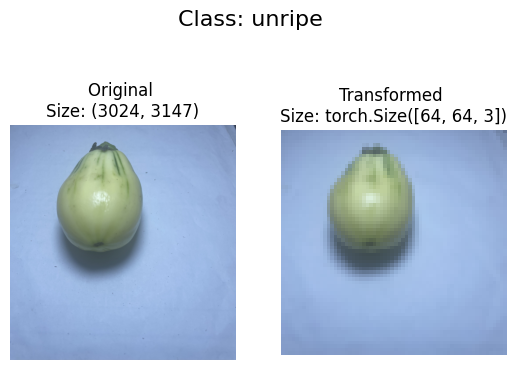

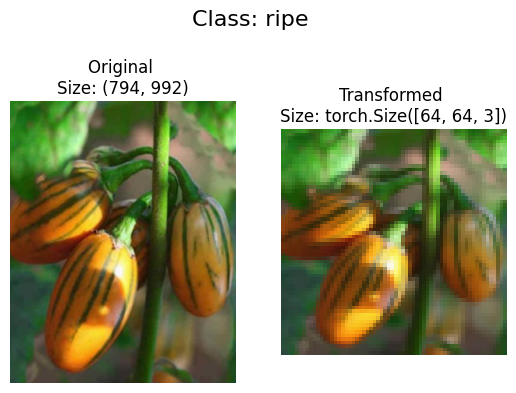

In [12]:
import matplotlib.pyplot as plt
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [13]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 625
    Root location: data\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 168
    Root location: data\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [14]:
# Get class names as a list
class_names = train_data.classes
class_names

['ripe', 'rotten', 'unripe']

In [15]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'ripe': 0, 'rotten': 1, 'unripe': 2}

In [16]:
len(train_data), len(test_data)

(625, 168)

In [17]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.5059, 0.5412, 0.4980,  ..., 0.4549, 0.4000, 0.4078],
         [0.5216, 0.5529, 0.4980,  ..., 0.5569, 0.4588, 0.3451],
         [0.5686, 0.5529, 0.5490,  ..., 0.5020, 0.5098, 0.3961],
         ...,
         [0.4863, 0.5176, 0.5098,  ..., 0.3137, 0.3922, 0.3490],
         [0.5333, 0.5294, 0.5333,  ..., 0.2941, 0.3216, 0.3373],
         [0.4941, 0.5020, 0.5176,  ..., 0.2353, 0.2980, 0.3333]],

        [[0.4588, 0.4824, 0.4510,  ..., 0.3843, 0.3412, 0.3490],
         [0.4706, 0.4902, 0.4471,  ..., 0.4588, 0.3882, 0.3020],
         [0.5098, 0.4941, 0.4941,  ..., 0.4235, 0.4275, 0.3451],
         ...,
         [0.4471, 0.4745, 0.4627,  ..., 0.2941, 0.3569, 0.3176],
         [0.4784, 0.4824, 0.4824,  ..., 0.2745, 0.2980, 0.3137],
         [0.4471, 0.4510, 0.4667,  ..., 0.2235, 0.2784, 0.3059]],

        [[0.4235, 0.4471, 0.4196,  ..., 0.3490, 0.3176, 0.3216],
         [0.4353, 0.4588, 0.4157,  ..., 0.4118, 0.3608, 0.2902],
         [0.4667, 0.4588, 0.4549,  ..., 0.38

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


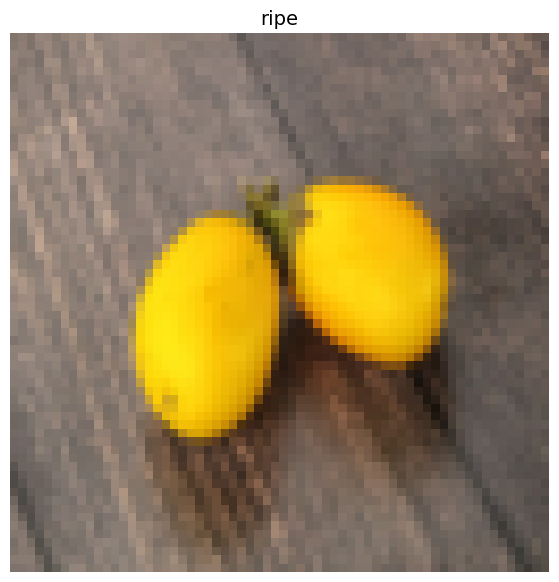

In [18]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [19]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1d2aa5b71c0>,
 <torch.utils.data.dataloader.DataLoader at 0x1d2aa5cebc0>)

In [20]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [21]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [22]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['ripe', 'rotten', 'unripe'], {'ripe': 0, 'rotten': 1, 'unripe': 2})

In [23]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data\train
Class names found: ['ripe', 'rotten', 'unripe']


In [24]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [25]:
find_classes(train_dir)

(['ripe', 'rotten', 'unripe'], {'ripe': 0, 'rotten': 1, 'unripe': 2})

In [26]:
find_classes(test_dir)

(['ripe', 'rotten', 'unripe'], {'ripe': 0, 'rotten': 1, 'unripe': 2})

In [27]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [28]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [29]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x1d2aa676e00>,
 <__main__.ImageFolderCustom at 0x1d2aa676080>)

In [30]:
len(train_data_custom), len(test_data_custom)

(601, 165)

In [31]:
train_data_custom.classes

['ripe', 'rotten', 'unripe']

In [32]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

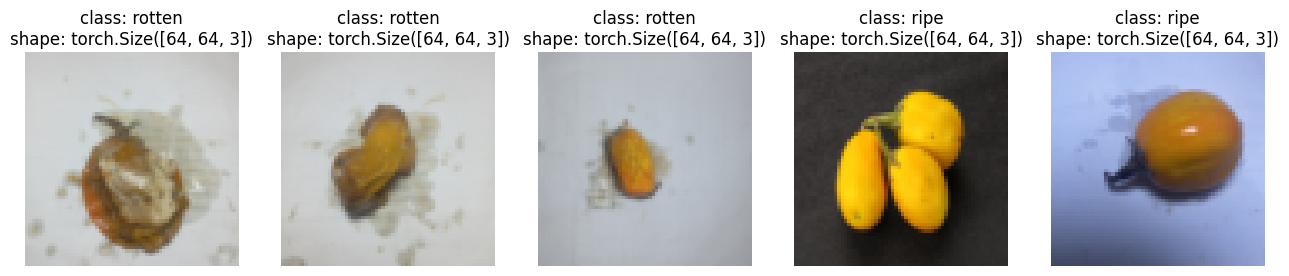

In [33]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


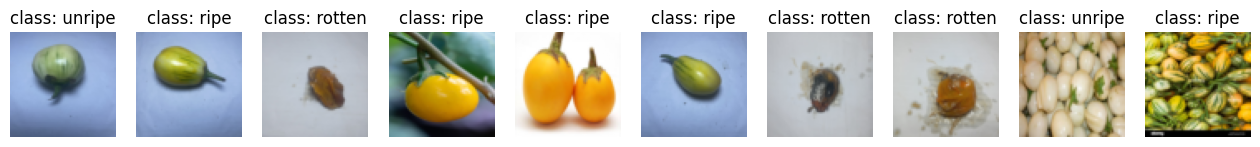

In [34]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names,
                      seed=None) # Try setting the seed for reproducible images

In [35]:
from torch.utils.data import DataLoader
train_data_loader_custom = DataLoader(dataset=train_data_custom, batch_size=1, num_workers=0, shuffle=True)
test_data_loader_custom = DataLoader(dataset=test_data_custom, batch_size=1, num_workers=0, shuffle=False)

train_data_loader_custom, test_data_loader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1d2aa5cf280>,
 <torch.utils.data.dataloader.DataLoader at 0x1d2aa676ef0>)

In [36]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_data_loader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [37]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

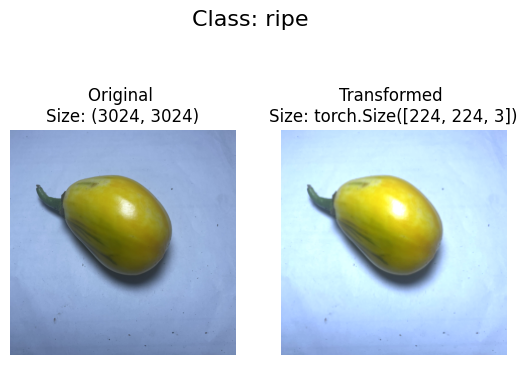

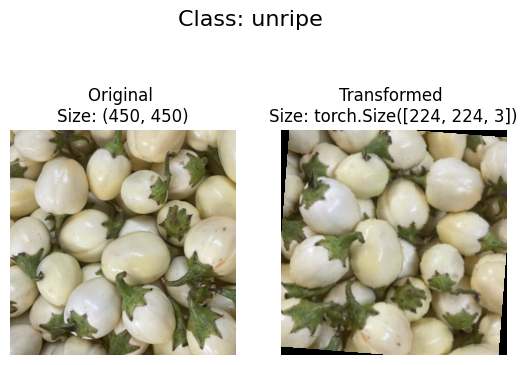

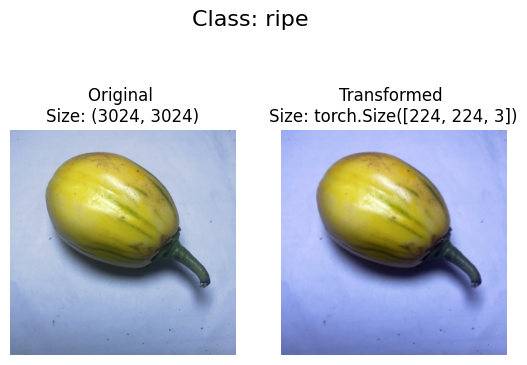

In [38]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

In [39]:
# Create simple transform
simple_transform = transforms.Compose([ 
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
])

In [40]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 4 workers.


(<torch.utils.data.dataloader.DataLoader at 0x1d2aadfe740>,
 <torch.utils.data.dataloader.DataLoader at 0x1d2aa530490>)

In [41]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # self.conv_block_3 = nn.Sequential(
        #     nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(2)
        # )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        # x = self.conv_block_1(x)
        # # print(x.shape)
        # x = self.conv_block_2(x)
        # # print(x.shape)
        # x = self.classifier(x)
        # # print(x.shape)
        # return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=128, 
                  output_shape=len(train_data.classes))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=32768, out_features=3, bias=True)
  )
)

In [42]:
image_batch, label_batch = next(iter(train_data_loader_custom))

image_single, label_single = image_batch[0].unsqueeze(dim=0), label_batch
print(f"Image shape: {image_single.shape}")
print(f"Label shape: {label_single.shape}")

model_0.eval()
with torch.inference_mode():
    pred = model_0(image_single)
    
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Image shape: torch.Size([1, 3, 64, 64])
Label shape: torch.Size([1])
Output logits:
tensor([[-0.0264,  0.0292,  0.0022]])

Output prediction probabilities:
tensor([[0.3240, 0.3426, 0.3334]])

Output prediction label:
tensor([1])

Actual label:
tensor([0])


In [43]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 128, 32, 32]          --
│    └─Conv2d: 2-1                       [1, 128, 64, 64]          3,584
│    └─ReLU: 2-2                         [1, 128, 64, 64]          --
│    └─Conv2d: 2-3                       [1, 128, 64, 64]          147,584
│    └─ReLU: 2-4                         [1, 128, 64, 64]          --
│    └─MaxPool2d: 2-5                    [1, 128, 32, 32]          --
├─Sequential: 1-2                        [1, 128, 16, 16]          --
│    └─Conv2d: 2-6                       [1, 128, 32, 32]          147,584
│    └─ReLU: 2-7                         [1, 128, 32, 32]          --
│    └─Conv2d: 2-8                       [1, 128, 32, 32]          147,584
│    └─ReLU: 2-9                         [1, 128, 32, 32]          --
│    └─MaxPool2d: 2-10                   [1, 128, 16, 16]          

In [44]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X, y

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [45]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X, y
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [46]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=256, 
                  output_shape=len(train_data.classes))

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.0001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

 10%|█         | 1/10 [06:11<55:45, 371.76s/it]

Epoch: 1 | train_loss: 1.0418 | train_acc: 0.4696 | test_loss: 1.0553 | test_acc: 0.4375


 20%|██        | 2/10 [11:23<44:53, 336.74s/it]

Epoch: 2 | train_loss: 0.9144 | train_acc: 0.5933 | test_loss: 0.8027 | test_acc: 0.5677


 30%|███       | 3/10 [16:37<38:03, 326.23s/it]

Epoch: 3 | train_loss: 0.7338 | train_acc: 0.6603 | test_loss: 0.9165 | test_acc: 0.5729


 40%|████      | 4/10 [21:20<30:53, 308.97s/it]

Epoch: 4 | train_loss: 0.7139 | train_acc: 0.6964 | test_loss: 0.7422 | test_acc: 0.6771


 50%|█████     | 5/10 [26:23<25:35, 307.05s/it]

Epoch: 5 | train_loss: 0.6065 | train_acc: 0.7459 | test_loss: 0.6504 | test_acc: 0.7135


 60%|██████    | 6/10 [30:35<19:12, 288.09s/it]

Epoch: 6 | train_loss: 0.6046 | train_acc: 0.7615 | test_loss: 0.7232 | test_acc: 0.6927


 70%|███████   | 7/10 [34:41<13:43, 274.39s/it]

Epoch: 7 | train_loss: 0.5685 | train_acc: 0.7912 | test_loss: 0.5395 | test_acc: 0.7656


 80%|████████  | 8/10 [38:48<08:51, 265.67s/it]

Epoch: 8 | train_loss: 0.5396 | train_acc: 0.7773 | test_loss: 0.6417 | test_acc: 0.7396


 90%|█████████ | 9/10 [42:59<04:20, 261.00s/it]

Epoch: 9 | train_loss: 0.4950 | train_acc: 0.7988 | test_loss: 0.7404 | test_acc: 0.6615


100%|██████████| 10/10 [1:43:41<00:00, 622.19s/it] 

Epoch: 10 | train_loss: 0.5283 | train_acc: 0.8105 | test_loss: 0.5105 | test_acc: 0.8281
Total training time: 6222.368 seconds


In [48]:
model_0_results

{'train_loss': [1.041750541329384,
  0.9143740326166153,
  0.7338459670543671,
  0.7138758912682533,
  0.6064781606197357,
  0.6045920208096505,
  0.568484129011631,
  0.5395755216479301,
  0.4950197026133537,
  0.5282676234841347],
 'train_acc': [0.4695772058823529,
  0.5932904411764706,
  0.6602941176470588,
  0.6964154411764706,
  0.7458639705882353,
  0.7614889705882353,
  0.7911764705882354,
  0.7772977941176471,
  0.7988051470588236,
  0.8104779411764707],
 'test_loss': [1.055292397737503,
  0.802731990814209,
  0.9165159066518148,
  0.742245689034462,
  0.6504195481538773,
  0.7232127984364828,
  0.5394892543554306,
  0.6416515111923218,
  0.7404075413942337,
  0.5105482662717501],
 'test_acc': [0.4375,
  0.5677083333333334,
  0.5729166666666666,
  0.6770833333333334,
  0.7135416666666666,
  0.6927083333333334,
  0.765625,
  0.7395833333333334,
  0.6614583333333334,
  0.828125]}

In [49]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

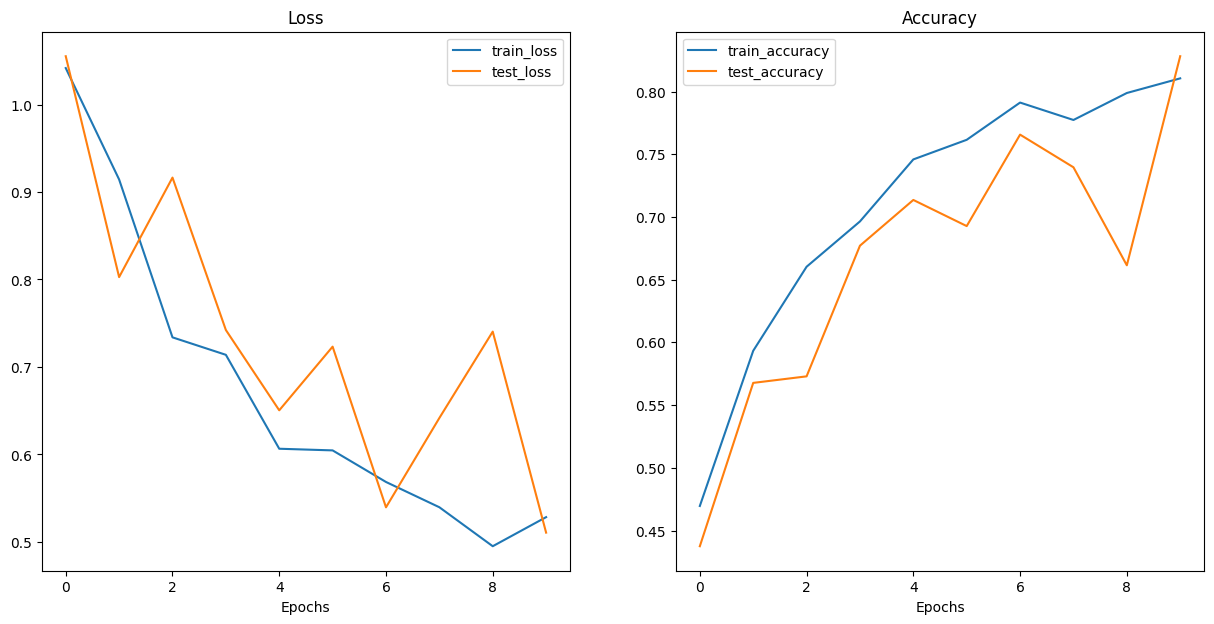

In [50]:
plot_loss_curves(model_0_results)

In [51]:
image_batch, label_batch = next(iter(train_data_loader_custom))

image_single, label_single = image_batch[0].unsqueeze(dim=0), label_batch
print(f"Image shape: {image_single.shape}")
print(f"Label shape: {label_single.shape}")

model_0.eval()
with torch.inference_mode():
    pred = model_0(image_single)
    
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Image shape: torch.Size([1, 3, 64, 64])
Label shape: torch.Size([1])
Output logits:
tensor([[-2.8667,  3.4351, -2.1212]])

Output prediction probabilities:
tensor([[0.0018, 0.9943, 0.0038]])

Output prediction label:
tensor([1])

Actual label:
tensor([1])


In [52]:
# import numpy as np
# import pandas as pd

# # 1) Set a random seed for reproducibility
# np.random.seed(42)

# # 2) Decide how many rows you want
# num_rows = 2000

# # 3) Generate each column according to plausible geologic ranges
# Depth = np.linspace(2000, 4000, num_rows)  # from 2,000 m to 4,000 m linearly

# Porosity = np.random.uniform(0.10, 0.35, num_rows)  # 10–35%
# Permeability = np.random.uniform(1, 500, num_rows)  # 1–500 mD
# BulkDensity = np.random.uniform(2.2, 2.7, num_rows) # 2.2–2.7 g/cc
# PwaveVelocity = np.random.uniform(3000, 4500, num_rows) # 3000–4500 m/s
# SwaveVelocity = np.random.uniform(1800, 2800, num_rows) # 1800–2800 m/s
# PoissonRatio = np.random.uniform(0.20, 0.35, num_rows)  # 0.20–0.35
# YoungsModulus = np.random.uniform(10, 35, num_rows)     # 10–35 GPa
# MinHorizontalStress = np.random.uniform(40, 70, num_rows)   # 40–70 MPa
# MaxHorizontalStress = np.random.uniform(60, 90, num_rows)   # 60–90 MPa
# OverburdenStress = np.random.uniform(80, 110, num_rows)     # 80–110 MPa

# # 4) For a synthetic target, let's say higher porosity & lower modulus
# # increases sanding risk. We can make a simple function:
# SandingRisk = []
# for i in range(num_rows):
#     # A simple heuristic: if porosity is above 0.25 and Young's Modulus < 20 => high risk
#     if Porosity[i] > 0.25 and YoungsModulus[i] < 20:
#         SandingRisk.append(1)
#     else:
#         SandingRisk.append(0)

# # 5) Combine everything into a DataFrame
# df = pd.DataFrame({
#     'Depth_m': Depth,
#     'Porosity': Porosity,
#     'Permeability_mD': Permeability,
#     'BulkDensity_gcc': BulkDensity,
#     'PwaveVelocity_ms': PwaveVelocity,
#     'SwaveVelocity_ms': SwaveVelocity,
#     'PoissonRatio': PoissonRatio,
#     'YoungsModulus_GPa': YoungsModulus,
#     'MinHorizontalStress_MPa': MinHorizontalStress,
#     'MaxHorizontalStress_MPa': MaxHorizontalStress,
#     'OverburdenStress_MPa': OverburdenStress,
#     'SandingRisk': SandingRisk
# })

# # 6) Save to CSV
# df.to_csv('synthetic_sand_dataset.csv', index=False)

# print("Synthetic dataset created and saved to synthetic_sand_dataset.csv")
# print(df.head(10))  # Print first 10 rows as a preview

In [53]:
# from sklearn.model_selection import GridSearchCV

# # Define hyperparameter grid
# param_grid = {
#     'hidden_dim1': [128, 256],
#     'hidden_dim2': [64, 128],
#     'learning_rate': [0.001, 0.0001],
#     'batch_size': [32, 64, 128],
#     'epochs': [5, 10]
# }

# # Initialize the model
# cnn_model = TinyVGG()

# # GridSearchCV
# grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=3)
# grid_search.fit(train_dataloader_simple, test_dataloader_simple)

# # Best hyperparameters and score
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


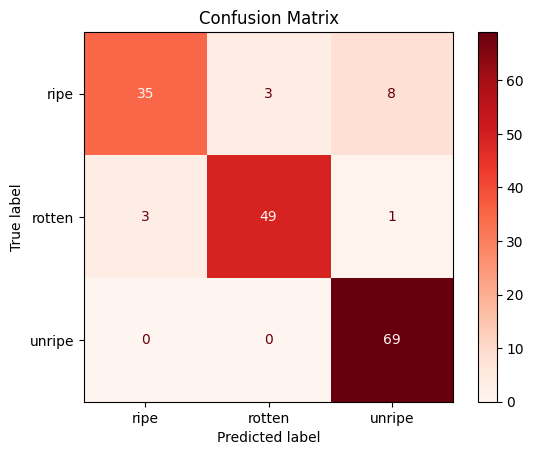

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# Get predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model_0(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(3)))
disp.plot(cmap=plt.cm.Reds)
plt.xticks([0,1,2], ["ripe", "rotten", "unripe"])
plt.yticks([0,1,2], ["ripe", "rotten", "unripe"])
plt.title("Confusion Matrix")
plt.show()


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Assuming `all_preds` and `all_labels` are already gathered as shown earlier
# Convert predictions and labels to numpy arrays (if not already)
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Compute metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')  # Change average as needed
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

Accuracy: 0.91
Precision: 0.92
Recall: 0.90
F1-Score: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        46
           1       0.94      0.92      0.93        53
           2       0.88      1.00      0.94        69

    accuracy                           0.91       168
   macro avg       0.92      0.90      0.90       168
weighted avg       0.91      0.91      0.91       168



In [56]:
import torch

# Assuming 'model' is your trained PyTorch model
model_path = "model.pth"

# Save only the state dictionary (recommended)
torch.save(model_0.state_dict(), model_path)

print(f"Model saved to {model_path}")


Model saved to model.pth


In [57]:
import torch
import torch.nn as nn
import torchvision.models as models

# Define the model architecture (must match the saved model)
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # self.conv_block_3 = nn.Sequential(
        #     nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(2)
        # )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        # x = self.conv_block_1(x)
        # # print(x.shape)
        # x = self.conv_block_2(x)
        # # print(x.shape)
        # x = self.classifier(x)
        # # print(x.shape)
        # return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

# Create model instance
model = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=256, 
                  output_shape=len(train_data.classes))  # Ensure the number of classes matches

# Load the state dictionary
model.load_state_dict(torch.load("model.pth", map_location=torch.device("cpu")))

# Set model to evaluation mode
model.eval()

print("Model loaded successfully for inference!")


Model loaded successfully for inference!


C:\Users\USER\AppData\Local\Temp\ipykernel_12744\2389098810.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth", map_location=t